In [51]:
import pandas as pd

# Load your portfolio variants and the OAP benchmark
df_prop = pd.read_csv('../data/processed/filtered_portfolio_returns-PROP.csv', parse_dates=['month'])
df_wins = pd.read_csv('../data/processed/filtered_portfolio_returns-WINS.csv', parse_dates=['month'])
df_oap = pd.read_csv('../data/processed/OAP_signal_returns.csv', parse_dates=['date'])

# Rename OAP date column to match others
df_oap.rename(columns={'date': 'month'}, inplace=True)

# Check
print(df_prop.head())
print(df_wins.head())
print(df_oap.head())

df_oap


       month  portfolio_return  portfolio_return_decimal  cum_portfolio
0 1994-05-31         -0.271882                 -0.002719       0.997281
1 1994-06-30         -1.792614                 -0.017926       0.979404
2 1994-07-29          1.173612                  0.011736       0.990898
3 1994-08-31         -0.643994                 -0.006440       0.984517
4 1994-09-30         -1.278395                 -0.012784       0.971931
       month  portfolio_return  portfolio_return_decimal  cum_portfolio
0 1994-05-31         -0.051703                 -0.000517       0.999483
1 1994-08-31         -0.501820                 -0.005018       0.994467
2 1994-11-30         -1.068947                 -0.010689       0.983837
3 1995-05-31         -0.659955                 -0.006600       0.977344
4 1995-06-30          0.801118                  0.008011       0.985174
  signalname      month       ret  cum_return
0         BM 1994-05-31  0.853893    1.008539
1         BM 1994-06-30  0.600545    1.01459

,signalname,month,ret,cum_return
0,BM,1994-05-31,0.853893,1.008539
1,BM,1994-06-30,0.600545,1.014596
2,BM,1994-07-29,-0.588024,1.008630
3,BM,1994-08-31,0.832374,1.017025
4,BM,1994-09-30,0.060671,1.017642
...,...,...,...,...
707,Mom12m,2023-08-31,9.140462,1.967437
708,Mom12m,2023-09-29,7.178104,2.108662
709,Mom12m,2023-10-31,6.032221,2.235861
710,Mom12m,2023-11-30,6.939888,2.391027


Merging with other dataframes:

In [52]:
signallist = ['BM', 'Mom12m']


In [54]:
# Step 1: Rename return columns for clarity
df_prop_renamed = df_prop[['month', 'portfolio_return', 'cum_portfolio']].rename(
    columns={'portfolio_return': 'prop_return', 'cum_portfolio': 'cum_prop'}
)

df_wins_renamed = df_wins[['month', 'portfolio_return', 'cum_portfolio']].rename(
    columns={'portfolio_return': 'wins_return', 'cum_portfolio': 'cum_wins'}
)

# Step 2: Pivot df_oap so each signal has its own return and cumulative column
df_oap_returns = df_oap.pivot(index='month', columns='signalname', values='ret').reset_index()
df_oap_cum = df_oap.pivot(index='month', columns='signalname', values='cum_return').reset_index()

# Rename cumulative columns
df_oap_cum.columns = ['month'] + [f'cum_{col}' for col in df_oap_cum.columns[1:]]

# Step 3: Merge all datasets on 'month'
df_merged = (
    df_prop_renamed
    .merge(df_wins_renamed, on='month', how='outer')
    .merge(df_oap_returns, on='month', how='outer')
    .merge(df_oap_cum, on='month', how='outer')
)

# Step 4: Sort by month
df_merged = df_merged.sort_values('month')

df_merged.head()


,month,prop_return,cum_prop,wins_return,cum_wins,BM,Mom12m,cum_BM,cum_Mom12m
0,1994-05-31,-0.271882,0.997281,-0.051703,0.999483,0.853893,-3.231834,1.008539,0.967682
1,1994-06-30,-1.792614,0.979404,NaN,NaN,0.600545,0.722481,1.014596,0.974673
2,1994-07-29,1.173612,0.990898,NaN,NaN,-0.588024,2.649333,1.008630,1.000495
3,1994-08-31,-0.643994,0.984517,-0.501820,0.994467,0.832374,0.855373,1.017025,1.009053
4,1994-09-30,-1.278395,0.971931,NaN,NaN,0.060671,0.937718,1.017642,1.018515


Filter to our portfolios' range:

In [55]:
# Filter df_merged to only include months present in df_prop
valid_months = df_prop['month'].dropna().unique()
df_merged = df_merged[df_merged['month'].isin(valid_months)].copy()

# Optional: sort again just in case
df_merged = df_merged.sort_values('month')


In [42]:
df_merged

,month,prop_return,cum_prop,wins_return,cum_wins,BM,Mom12m,cum_BM,cum_Mom12m
808,1994-05-31,-0.271882,0.997281,-0.051703,0.999483,0.853893,-3.231834,50.064304,27.556171
809,1994-06-30,-1.792614,0.979404,NaN,NaN,0.600545,0.722481,50.364963,27.755259
810,1994-07-29,1.173612,0.990898,NaN,NaN,-0.588024,2.649333,50.068805,28.490588
811,1994-08-31,-0.643994,0.984517,-0.501820,0.994467,0.832374,0.855373,50.485565,28.734289
812,1994-09-30,-1.278395,0.971931,NaN,NaN,0.060671,0.937718,50.516195,29.003735
...,...,...,...,...,...,...,...,...,...
1171,2024-08-30,-0.940091,0.759304,NaN,NaN,NaN,NaN,NaN,NaN
1172,2024-09-30,-0.034985,0.759038,-0.394045,1.303940,NaN,NaN,NaN,NaN
1173,2024-10-31,0.124382,0.759983,-0.794644,1.293579,NaN,NaN,NaN,NaN
1174,2024-11-29,0.611263,0.764628,NaN,NaN,NaN,NaN,NaN,NaN


### Plot:

Returns:

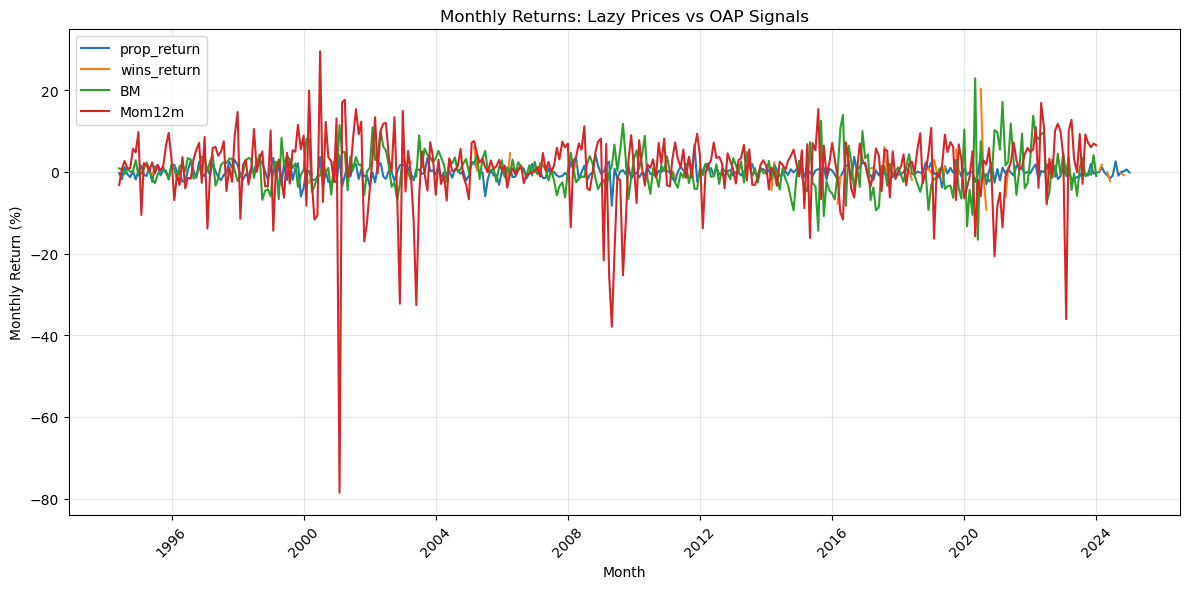

In [56]:
import matplotlib.pyplot as plt

# Define columns to plot
return_cols = ['prop_return', 'wins_return', 'BM', 'Mom12m']

plt.figure(figsize=(12, 6))
for col in return_cols:
    plt.plot(df_merged['month'], df_merged[col], label=col)

plt.xlabel("Month")
plt.ylabel("Monthly Return (%)")
plt.title("Monthly Returns: Lazy Prices vs OAP Signals")
plt.legend()
plt.grid(alpha=0.3)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


Cumulative returns:

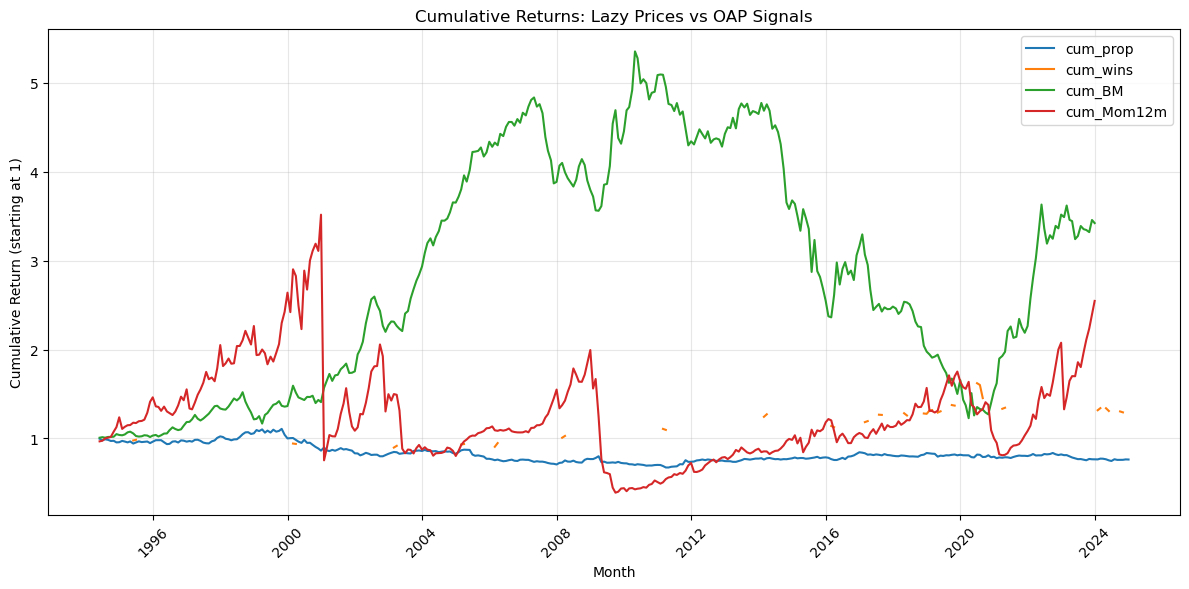

In [57]:
# Define cumulative return columns
cum_cols = ['cum_prop', 'cum_wins', 'cum_BM', 'cum_Mom12m']

plt.figure(figsize=(12, 6))
for col in cum_cols:
    plt.plot(df_merged['month'], df_merged[col], label=col)

plt.xlabel("Month")
plt.ylabel("Cumulative Return (starting at 1)")
plt.title("Cumulative Returns: Lazy Prices vs OAP Signals")
plt.legend()
plt.grid(alpha=0.3)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


Moving averages:

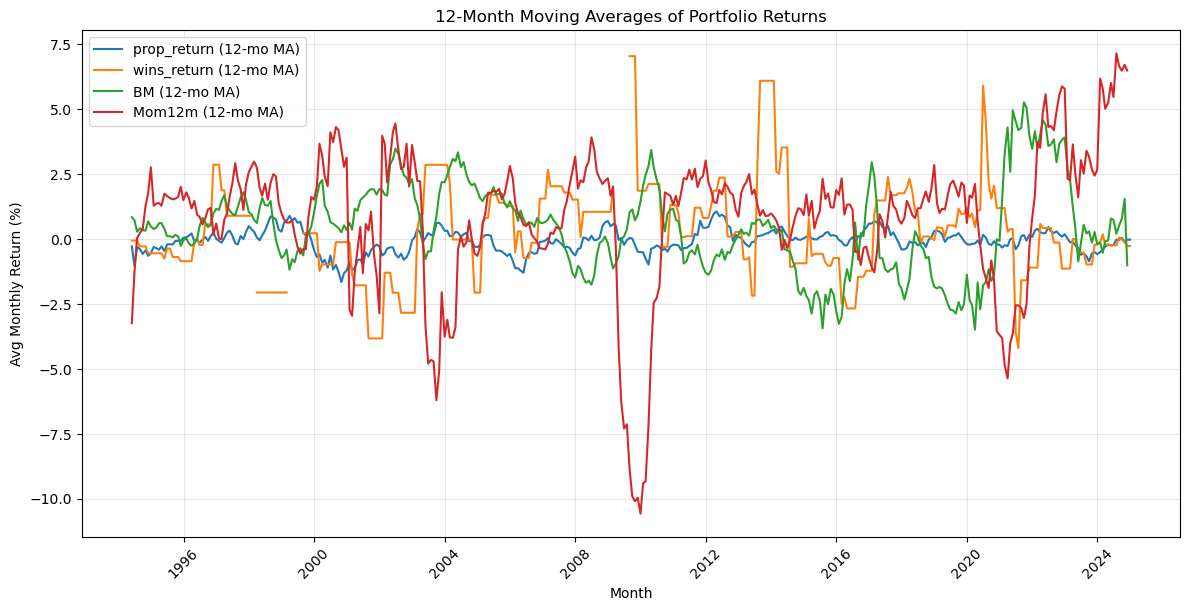

In [58]:
import matplotlib.pyplot as plt

# Make a copy to avoid modifying the original
df_ma = df_merged.copy()

# Apply 12-month moving average to return columns (exclude cumulative ones)
return_cols = ['prop_return', 'wins_return', 'BM', 'Mom12m']
for col in return_cols:
    df_ma[f'ma_{col}'] = df_ma[col].rolling(window=12, min_periods=1).mean()

# Plot moving averages
plt.figure(figsize=(12, 6))
for col in return_cols:
    plt.plot(df_ma['month'], df_ma[f'ma_{col}'], label=f'{col} (12-mo MA)')

plt.title('12-Month Moving Averages of Portfolio Returns')
plt.xlabel('Month')
plt.ylabel('Avg Monthly Return (%)')
plt.legend()
plt.grid(alpha=0.3)
plt.tight_layout()
plt.xticks(rotation=45)
plt.show()


The chart shows the 12-month moving average returns of four long-short portfolios: two from the Lazy Prices replication (with and without similarity-score propagation) and two from the Open Asset Pricing (OAP) anomaly datasets 

Log of cumulative returns:

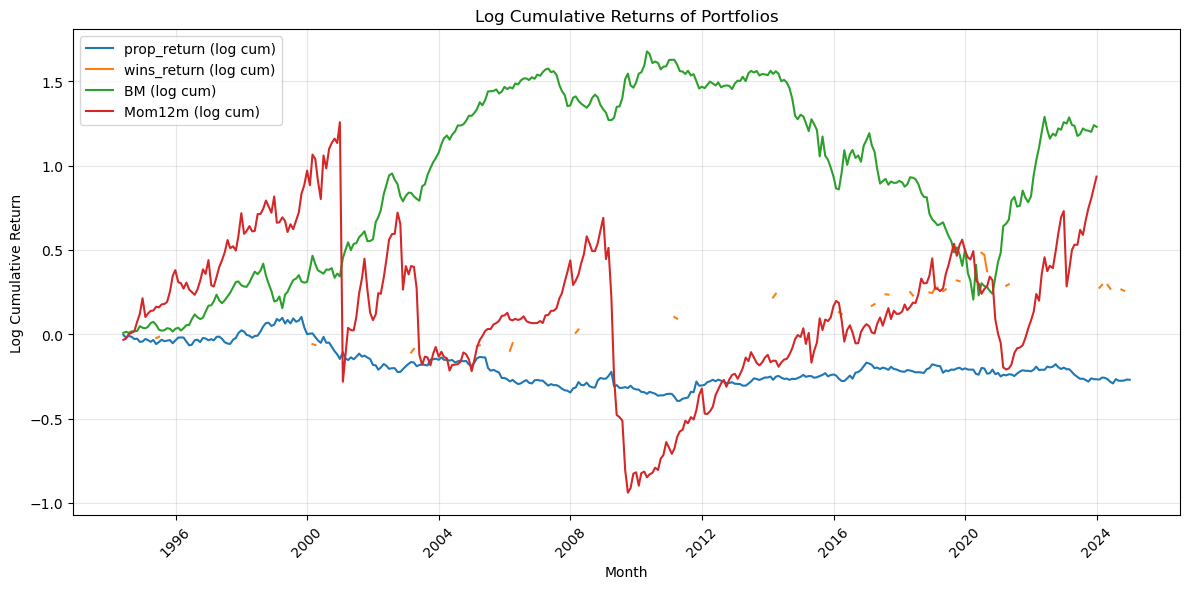

In [59]:
import numpy as np
import matplotlib.pyplot as plt

# Make a copy to avoid modifying original df
df_log = df_merged.copy()

# List of return columns to transform
return_cols = ['prop_return', 'wins_return', 'BM', 'Mom12m']

# Convert returns from percent to decimal
for col in return_cols:
    df_log[col + '_log_cum'] = np.log1p(df_log[col] / 100).cumsum()

# Plot log cumulative returns
plt.figure(figsize=(12, 6))
for col in return_cols:
    plt.plot(df_log['month'], df_log[col + '_log_cum'], label=f'{col} (log cum)')

plt.xlabel('Month')
plt.ylabel('Log Cumulative Return')
plt.title('Log Cumulative Returns of Portfolios')
plt.legend()
plt.grid(alpha=0.3)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


Log cumulative returns show a consistently positive cumulative return for our portfolio without propagation, which confirms our hypothesis. We suspect that the propagated portfolio performed so poorly because of the fact that our signal builder failed to compute many scores, so we propagated long-short assignments for months where propagation could not be assumed. 